# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


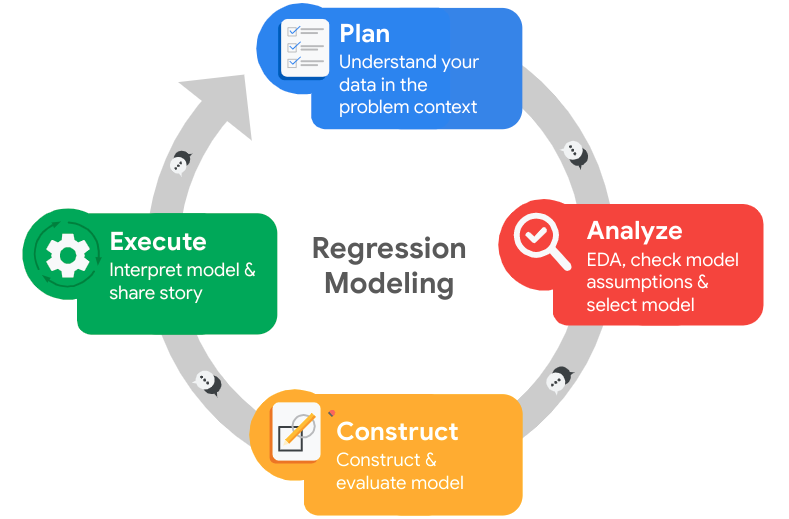

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={"average_montly_hours": "avg_monthly_hours",
                          "time_spend_company": "tenure",
                          "Work_accident": "work_accident", 
                          "Department": "department"})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
avg_monthly_hours        0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
emp_df = df0.drop_duplicates(keep="first")

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
print("# Duplicated Values in emp_df:", emp_df.duplicated().sum())
emp_df.head()

# Duplicated Values in emp_df: 0


,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

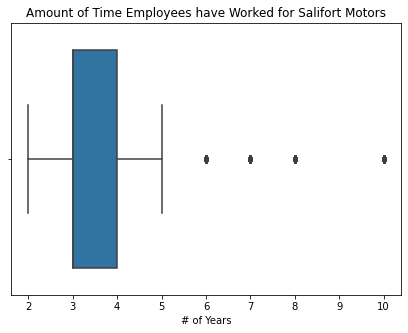

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(emp_df["tenure"])
plt.title("Amount of Time Employees have Worked for Salifort Motors")
plt.xlabel("# of Years")
plt.show()

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
percentile_25 = emp_df["tenure"].quantile(0.25)
percentile_75 = emp_df["tenure"].quantile(0.75)
iqr = percentile_75 - percentile_25

llimit = percentile_25 - 1.5*iqr
ulimit = percentile_75 + 1.5*iqr
print("Tenure Outlier Limits: [{},{}]".format(llimit, ulimit))

outliers = emp_df[(emp_df["tenure"]<llimit) | (emp_df["tenure"]>ulimit)]
print("# of Outliers in Tenure:", len(outliers))

Tenure Outlier Limits: [1.5,5.5]
# of Outliers in Tenure: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(emp_df["left"].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(emp_df["left"].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

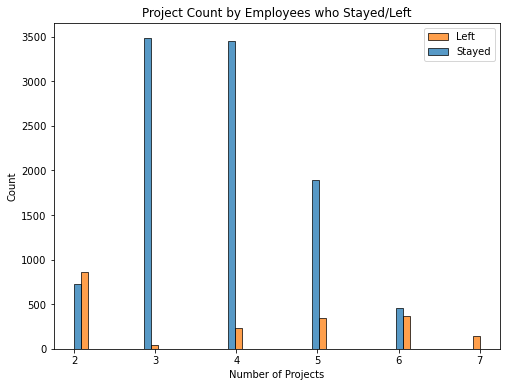

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=emp_df, x="number_project", hue="left", multiple="dodge")
plt.title("Project Count by Employees who Stayed/Left")
plt.xlabel("Number of Projects")
plt.legend(labels=["Left", "Stayed"])
plt.show()

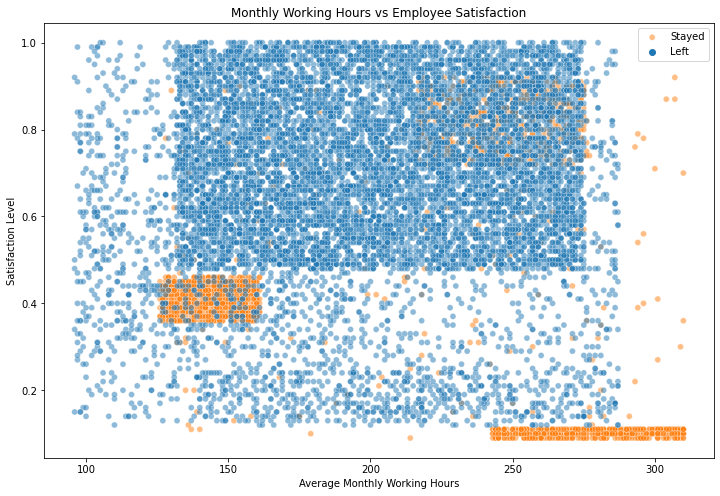

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=emp_df, x="avg_monthly_hours", y="satisfaction_level", hue="left", alpha=0.5)
plt.title("Monthly Working Hours vs Employee Satisfaction")
plt.xlabel("Average Monthly Working Hours")
plt.ylabel("Satisfaction Level")
plt.legend(labels=["Stayed", "Left"])
plt.show()

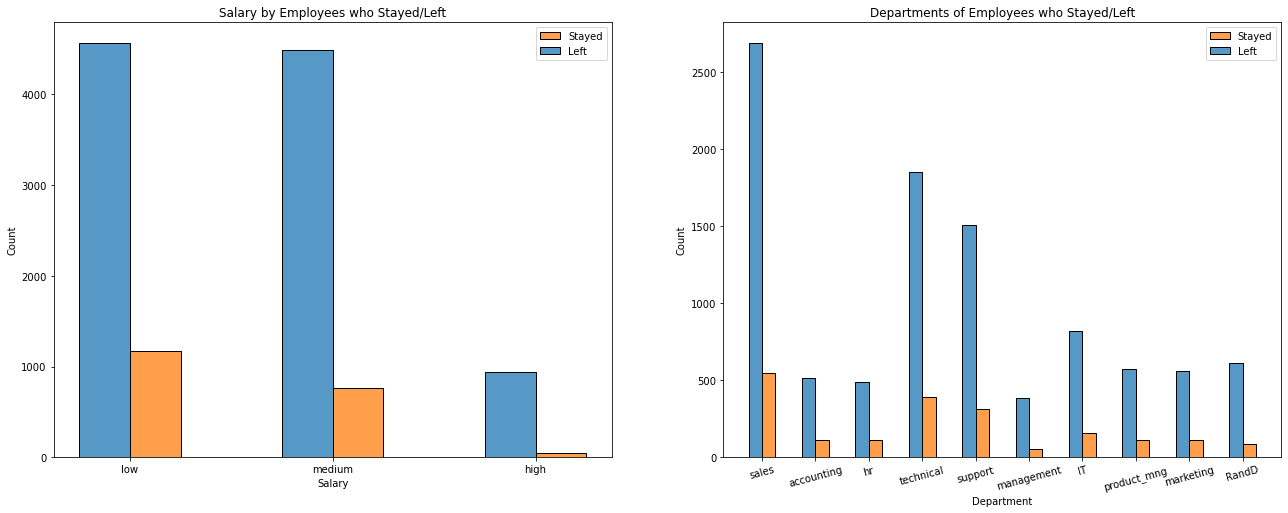

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(22,8))
sns.histplot(data=emp_df, x="salary", hue="left", multiple="dodge", shrink=0.5, ax=ax[0])
ax[0].set_title("Salary by Employees who Stayed/Left")
ax[0].set_xlabel("Salary")
ax[0].legend(labels=["Stayed", "Left"])
ax[1] = sns.histplot(data=emp_df, x="department", hue="left", multiple="dodge", shrink=0.5, ax=ax[1])
ax[1].set_title("Departments of Employees who Stayed/Left")
ax[1].set_xlabel("Department")
ax[1].tick_params(axis='x', labelrotation = 15)
ax[1].legend(labels=["Stayed", "Left"])
plt.show()

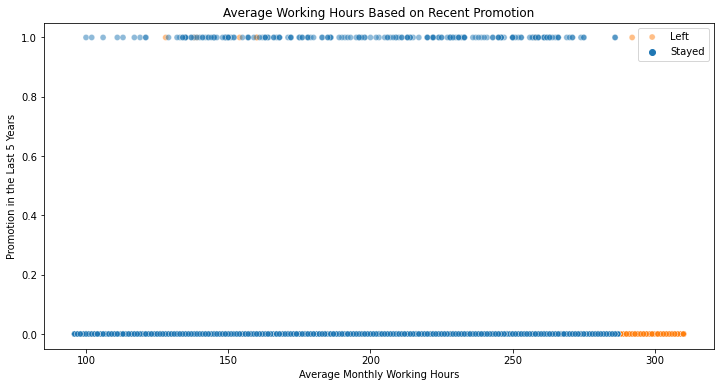

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=emp_df, x='avg_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.5)
plt.title("Average Working Hours Based on Recent Promotion")
plt.xlabel("Average Monthly Working Hours")
plt.ylabel("Promotion in the Last 5 Years")
plt.legend(labels=["Left", "Stayed"])
plt.show()

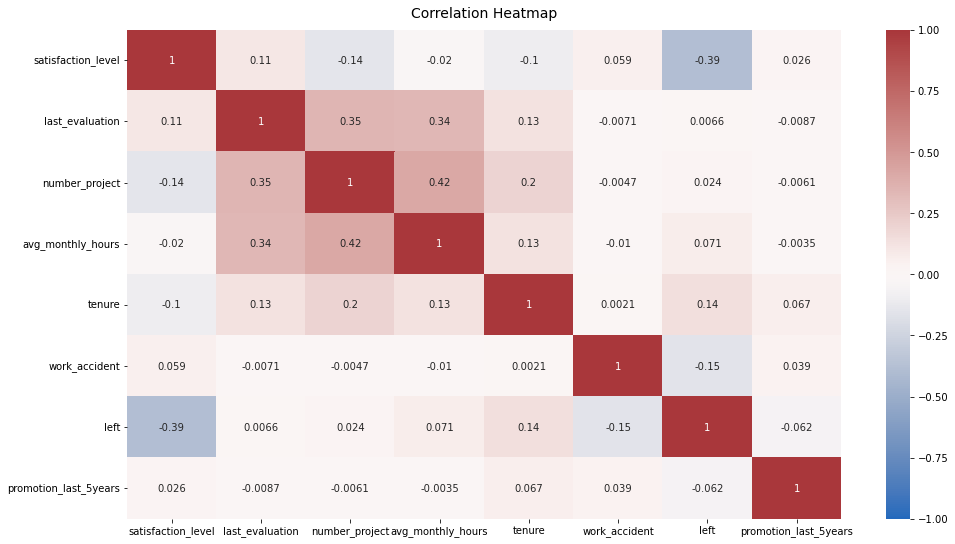

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()

### Insights

- Those who have worked on a very low number of projects (2) or a very high number of projects (6-7) tend to leave the company more than other employees. This leads to the idea that underworked and overworked employees are more likely to leave the company.
- Employees who work for an average monthly hours between ~240 and 320 are likely to have a lower satisfaction level and leave the company. Also, employees who work between 125 and 160 hours and have a satisfaction level around 0.4 tend to leave.
- As salary increases, the propotion of employees who quit decreases. There is no obvious pattern for employee retention between departments.
- Employees who work for over 275 monthly hours on average leave the company, especially if they have not been promoted within the past 5 years.
- There is no multicollinearity between any variables. The heatmap shows that "satisfaction_level" has the highest correlation on an employee leaving witha negative correlation.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This prediction involves predicting the categorical variable `left` as either 0 (stayed with the company) or 1 (left the company).

### Identify the types of models most appropriate for this task.

Due to the relatively low number of outliers and the lack of multicollinearity, a logistic regression model will be best to predict the categorical variable `left`.

### Modeling

Add as many cells as you need to conduct the modeling process.

### Logistic Regression Model

In [19]:
### YOUR CODE HERE ###
# Encode categorical variables
df = emp_df.copy()
salary_dict = {"low": 0, 
              "medium": 1,
              "high": 2}
df["salary"] = df["salary"].replace(salary_dict)
df = pd.get_dummies(df, drop_first=False)
df.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


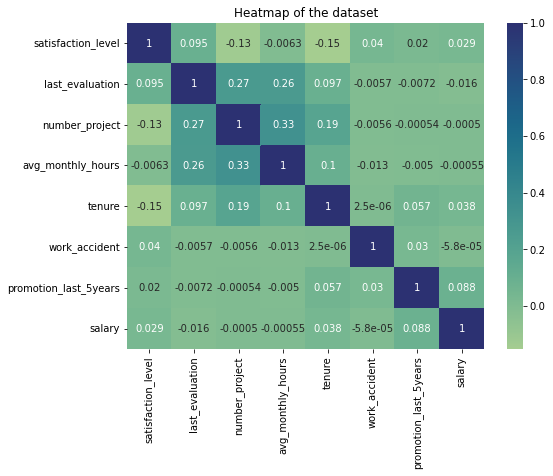

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["satisfaction_level", "last_evaluation", "number_project", "avg_monthly_hours", "tenure",
               "work_accident", "promotion_last_5years", "salary"]].corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [21]:
# Remove outliers from df for logistic regression
logreg_df = df[(df["tenure"]>=llimit) & (df["tenure"]<=ulimit)]
len(logreg_df)

11167

In [22]:
# Isolate features and outcome variable
X = logreg_df.drop("left", axis=1)
y = logreg_df["left"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (11167, 18)
y shape: (11167,)


In [23]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Build Logistic Regression Model
clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

# Get predicted y values
y_pred = clf.predict(X_test)

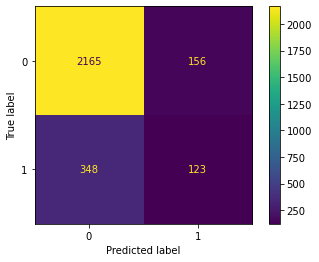

In [24]:
# Confusion Matrix to check results
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Show Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(values_format='')
plt.show()

The confusion matrix above shows how accurately the logistic regression model identifies each value.

- True Positives (Top Left): 2165 of 2792 = 77.5%
- True Negatives (Bottom Right): 123 of 2792 = 4.4%
- False Positives (Top Right): 156 of 2792 = 5.6%
- False Negatives (Bottom Left): 348 of 2792 = 12.5%

In [25]:
# Classification Report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



In [28]:
# Check influence of each feature on predicting left
influence = pd.Series(clf.coef_[0], index=X.columns)
influence = influence.sort_values(key=abs, ascending=False)
influence

satisfaction_level       -4.342216
work_accident            -1.500826
promotion_last_5years    -1.162908
tenure                    1.104225
salary                   -0.521515
number_project           -0.486120
department_RandD         -0.322737
department_accounting    -0.286185
department_management    -0.196840
department_marketing     -0.113399
department_product_mng   -0.099855
department_IT            -0.080436
department_sales          0.033214
department_technical      0.028319
department_support        0.021761
last_evaluation          -0.011544
avg_monthly_hours         0.003572
department_hr            -0.002660
dtype: float64

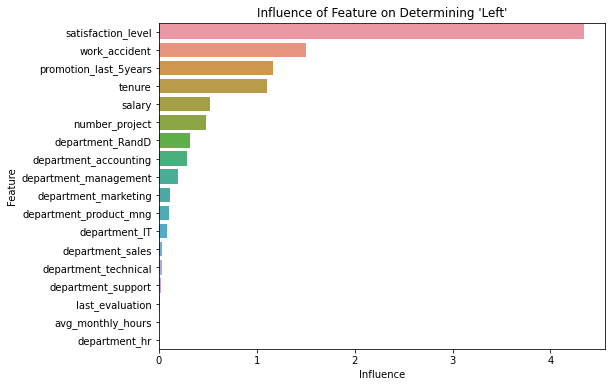

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(abs(influence.values), influence.index)
plt.title("Influence of Feature on Determining 'Left'")
plt.xlabel("Influence")
plt.ylabel("Feature")
plt.show()

The logistic regression model has an accuracy of 82% with high precision, recall, and f1 scores for predicting if employees would stay. However, it has lower scores when perdicting if employees would leave. Regardless, the model found that `satisfaction_level` has a significant influence on determining if employees leave or stay.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The logistic regression model is able to predict employees who would stay with 86% precision, 93% recall, and an f1-score of 90%. It has an overall accuracy of 82%. The most influencial feature to determining if an employee leaves or stays is `satisfaction_level`.

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.